# Motos Usadas

## Importación de datos

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from pycaret.regression import *
from sklearn import metrics
import pickle

In [95]:
data = pd.read_csv("../data/Used_Bikes.csv")

In [96]:
data

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha
...,...,...,...,...,...,...,...,...
32643,Hero Passion Pro 100cc,39000.0,Delhi,22000.0,First Owner,4.0,100.0,Hero
32644,TVS Apache RTR 180cc,30000.0,Karnal,6639.0,First Owner,9.0,180.0,TVS
32645,Bajaj Avenger Street 220,60000.0,Delhi,20373.0,First Owner,6.0,220.0,Bajaj
32646,Hero Super Splendor 125cc,15600.0,Jaipur,84186.0,First Owner,16.0,125.0,Hero


In [97]:
data.columns

Index(['bike_name', 'price', 'city', 'kms_driven', 'owner', 'age', 'power',
       'brand'],
      dtype='object')

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [99]:
data.describe()

,price,kms_driven,age,power
count,3.264800e+04,32648.000000,32648.000000,32648.000000
mean,6.829542e+04,26344.625184,8.048211,213.511302
std,9.071860e+04,22208.527695,4.031700,134.428868
min,4.400000e+03,1.000000,1.000000,100.000000
25%,2.500000e+04,12000.000000,5.000000,150.000000
50%,4.300000e+04,20373.000000,7.000000,150.000000
75%,8.000000e+04,35000.000000,10.000000,220.000000
max,1.900000e+06,750000.000000,63.000000,1800.000000


<AxesSubplot:ylabel='Density'>

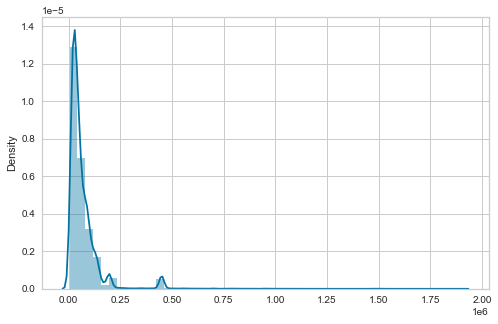

In [100]:
plt.figure(figsize = (8,5))
sns.distplot(x = data["price"])

In [101]:
data["price"].max()

1900000.0

In [102]:
data["price"].min()

4400.0

In [103]:
data.dtypes[data.dtypes == "object"].index

Index(['bike_name', 'city', 'owner', 'brand'], dtype='object')

In [104]:
data["owner"].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth Owner Or More'], dtype=object)

In [105]:
data.replace({'First Owner':1, 'Second Owner':2, 'Third Owner':3, 'Fourth Owner Or More':4}, inplace = True)

In [106]:
data["owner"]

0        1
1        1
2        1
3        1
4        1
        ..
32643    1
32644    1
32645    1
32646    1
32647    1
Name: owner, Length: 32648, dtype: int64

In [107]:
data["owner"].describe()

count    32648.000000
mean         1.086253
std          0.296037
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: owner, dtype: float64

In [108]:
data.columns

Index(['bike_name', 'price', 'city', 'kms_driven', 'owner', 'age', 'power',
       'brand'],
      dtype='object')

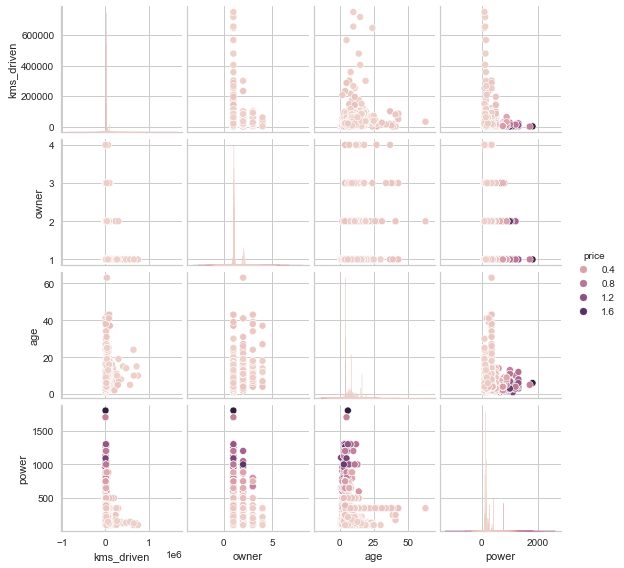

In [109]:
sns.pairplot(data, height = 2, hue = "price")

<AxesSubplot:>

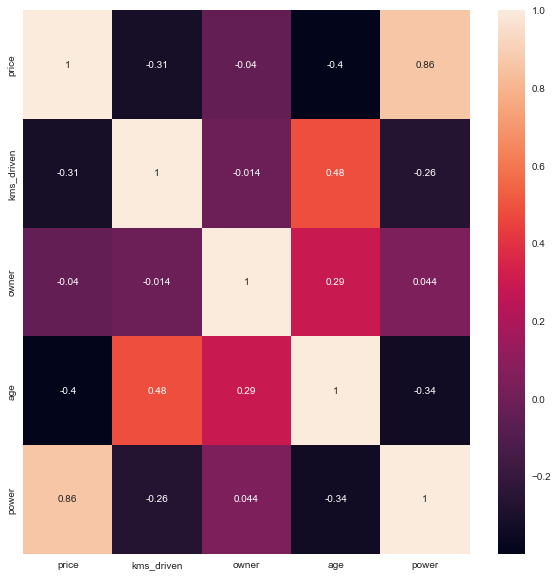

In [110]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), annot = True)

<AxesSubplot:xlabel='power', ylabel='price'>

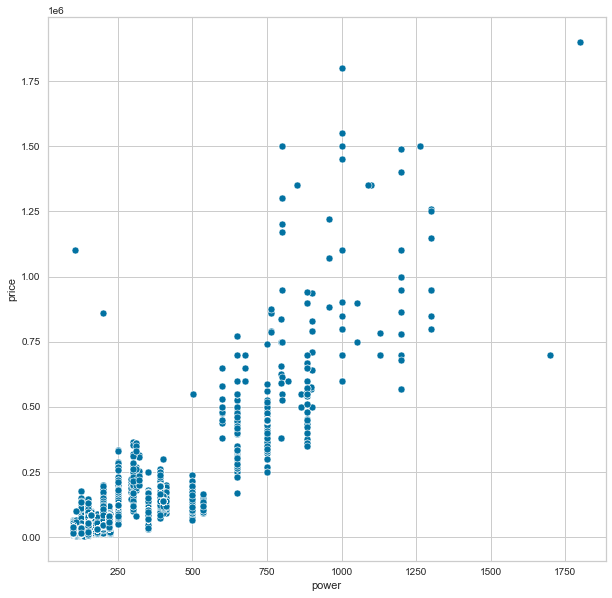

In [111]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = data["power"], y = data["price"])

In [112]:
data.nunique()

bike_name      471
price         1232
city           443
kms_driven    3722
owner            4
age             35
power           53
brand           23
dtype: int64

#### Vamos a crear otro data para comparar entre uno con la variable "bike_name" y sin la variable "bike_name" y luego vemos si el modelo predice mejor con uno o con otro.

In [113]:
data_no_bike_name = data.copy()

In [58]:
data

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,1,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,1,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,1,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,1,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,1,3.0,150.0,Yamaha
...,...,...,...,...,...,...,...,...
32643,Hero Passion Pro 100cc,39000.0,Delhi,22000.0,1,4.0,100.0,Hero
32644,TVS Apache RTR 180cc,30000.0,Karnal,6639.0,1,9.0,180.0,TVS
32645,Bajaj Avenger Street 220,60000.0,Delhi,20373.0,1,6.0,220.0,Bajaj
32646,Hero Super Splendor 125cc,15600.0,Jaipur,84186.0,1,16.0,125.0,Hero


In [59]:
data = pd.get_dummies(data)

In [61]:
data

,price,kms_driven,owner,age,power,bike_name_BMW F750 GS 850cc,bike_name_BMW G 310 GS,bike_name_BMW G 310 R,bike_name_BMW S 1000 RR Pro,bike_name_BMW S 1000 XR Pro,...,brand_LML,brand_MV,brand_Mahindra,brand_Rajdoot,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Triumph,brand_Yamaha,brand_Yezdi
0,35000.0,17654.0,1,3.0,110.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,119900.0,11000.0,1,4.0,350.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,600000.0,110.0,1,8.0,675.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,65000.0,16329.0,1,4.0,180.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,80000.0,10000.0,1,3.0,150.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32643,39000.0,22000.0,1,4.0,100.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32644,30000.0,6639.0,1,9.0,180.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32645,60000.0,20373.0,1,6.0,220.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32646,15600.0,84186.0,1,16.0,125.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Creación del modelo de Machine Learning

In [62]:
x = data.drop(columns = "price")
y = data["price"]

In [63]:
x

,kms_driven,owner,age,power,bike_name_BMW F750 GS 850cc,bike_name_BMW G 310 GS,bike_name_BMW G 310 R,bike_name_BMW S 1000 RR Pro,bike_name_BMW S 1000 XR Pro,bike_name_Bajaj Pulsar 180cc,...,brand_LML,brand_MV,brand_Mahindra,brand_Rajdoot,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Triumph,brand_Yamaha,brand_Yezdi
0,17654.0,1,3.0,110.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,11000.0,1,4.0,350.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,110.0,1,8.0,675.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,16329.0,1,4.0,180.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,10000.0,1,3.0,150.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32643,22000.0,1,4.0,100.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32644,6639.0,1,9.0,180.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32645,20373.0,1,6.0,220.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32646,84186.0,1,16.0,125.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
y

0         35000.0
1        119900.0
2        600000.0
3         65000.0
4         80000.0
           ...   
32643     39000.0
32644     30000.0
32645     60000.0
32646     15600.0
32647     22000.0
Name: price, Length: 32648, dtype: float64

In [67]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state=2)

In [68]:
data

,price,kms_driven,owner,age,power,bike_name_BMW F750 GS 850cc,bike_name_BMW G 310 GS,bike_name_BMW G 310 R,bike_name_BMW S 1000 RR Pro,bike_name_BMW S 1000 XR Pro,...,brand_LML,brand_MV,brand_Mahindra,brand_Rajdoot,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Triumph,brand_Yamaha,brand_Yezdi
0,35000.0,17654.0,1,3.0,110.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,119900.0,11000.0,1,4.0,350.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,600000.0,110.0,1,8.0,675.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,65000.0,16329.0,1,4.0,180.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,80000.0,10000.0,1,3.0,150.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32643,39000.0,22000.0,1,4.0,100.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32644,30000.0,6639.0,1,9.0,180.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32645,60000.0,20373.0,1,6.0,220.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32646,15600.0,84186.0,1,16.0,125.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
train = xtrain.copy()
train["price"] = ytrain

In [71]:
reg1 = setup(train, target = 'price', session_id=123, log_experiment=True, experiment_name='price')

In [72]:
best_model = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:45:29
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


In [73]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [75]:
best_model

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100,
             n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=123,
             reg_alpha=0, reg_lambda=1, ...)

In [77]:
best_model_tune = tune_model(best_model)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:19:16
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Extreme Gradient Boosting


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5334.3027,1182860800.0000,34392.7422,0.8767,0.1383,0.0804
1,5104.2573,338484128.0000,18397.9375,0.9589,0.1452,0.0945
2,4981.4224,307812864.0000,17544.5957,0.9672,0.1390,0.0889
3,4534.0376,173847344.0000,13185.1182,0.9771,0.1390,0.0896
4,5024.6851,254556256.0000,15954.8193,0.9728,0.1405,0.0915
5,5409.2651,695681408.0000,26375.7734,0.8898,0.1465,0.0906
6,5133.6826,330198880.0000,18171.3750,0.9665,0.1403,0.0914
7,4464.2900,255470592.0000,15983.4473,0.9652,0.1341,0.0861
8,4598.4292,420774688.0000,20512.7930,0.9470,0.1291,0.0826


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [78]:
best_model_tune

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100,
             n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=123,
             reg_alpha=0, reg_lambda=1, ...)

In [83]:
best_model.score(xtest, ytest)

0.95908115777426

In [84]:
xtest.iloc[0:1]

,kms_driven,owner,age,power,bike_name_BMW F750 GS 850cc,bike_name_BMW G 310 GS,bike_name_BMW G 310 R,bike_name_BMW S 1000 RR Pro,bike_name_BMW S 1000 XR Pro,bike_name_Bajaj Pulsar 180cc,...,brand_LML,brand_MV,brand_Mahindra,brand_Rajdoot,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Triumph,brand_Yamaha,brand_Yezdi
28981,18742.0,1,6.0,150.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [85]:
ytest.iloc[0:5]

28981     45000.0
31252     95500.0
4246      65000.0
7070      50100.0
13201    123000.0
Name: price, dtype: float64

In [86]:
print(metrics.mean_squared_error(ytest, best_model.predict(xtest)))
print(metrics.mean_absolute_error(ytest, best_model.predict(xtest)))
print(metrics.r2_score(ytest, best_model.predict(xtest)))

328389106.8447311
3719.2063480301254
0.95908115777426


## Probamos el otro dataset

In [116]:
data_no_bike_name

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,1,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,1,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,1,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,1,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,1,3.0,150.0,Yamaha
...,...,...,...,...,...,...,...,...
32643,Hero Passion Pro 100cc,39000.0,Delhi,22000.0,1,4.0,100.0,Hero
32644,TVS Apache RTR 180cc,30000.0,Karnal,6639.0,1,9.0,180.0,TVS
32645,Bajaj Avenger Street 220,60000.0,Delhi,20373.0,1,6.0,220.0,Bajaj
32646,Hero Super Splendor 125cc,15600.0,Jaipur,84186.0,1,16.0,125.0,Hero


In [119]:
data_no_bike_name.drop(columns = "bike_name", inplace = True)

In [123]:
data_no_bike_name = pd.get_dummies(data_no_bike_name)

In [124]:
data_no_bike_name

,price,kms_driven,owner,age,power,city_24 Pargana,city_Abohar,city_Adalaj,city_Adoni,city_Adyar,city_Agra,city_Ahmedabad,city_Ahmednagar,city_Ajmer,city_Akot,city_Alappuzha,city_Alibag,city_Aligarh,city_Alipore,city_Allahabad,city_Aluva,city_Alwar,city_Ambala,city_Ambikapur,city_Amraoti,city_Amravati,city_Amritsar,city_Anand,city_Anantapur,city_Anantnag,city_Anekal,city_Anjar,city_Ankleshwar,city_Aquem,city_Arkalgud,city_Arrah,city_Asansol,city_Aurangabad,city_Azamgarh,city_Badarpur,city_Badaun,city_Bagalkot,city_Baghpat,city_Bahadurgarh,city_Bahadurpur,city_Balaghat,city_Bally,city_Baloda,city_Balrampur,city_Bangalore,city_Banka,city_Banki,city_Bankura,city_Barabanki,city_Baran,city_Barasat,city_Bardhaman,city_Bareilly,city_Bargarh,city_Baripara,city_Basti,city_Batala,city_Begusarai,city_Belgaum,city_Bellary,city_Berhampore,city_Berhampur,city_Betul,city_Bharatpur,city_Bharuch,city_Bhatinda,city_Bhavnagar,city_Bhawani Mandi,city_Bhilai Nagar,city_Bhilwara,city_Bhiwadi,city_Bhiwandi,city_Bhiwani,city_Bhopal,city_Bhubaneshwar,city_Bhubaneswar,city_Bhuj,city_Bidar,city_Bihar Shariff,city_Bijapur,city_Bijnor,city_Bikaner,city_Bilaspur,city_Bodhan,city_Bokaro,city_Bolpur,city_Budhlada,city_Bulandshahr,city_Bundi,city_Burdwan,city_Buxar,city_Calicut,city_Cannanore (kannur),city_Chakan,city_Chaksu,city_Challakere,city_Chandigarh,city_Chandrapur,city_Chatrapur,city_Chenani,city_Chennai,city_Chhatarpur,city_Chhindwara,city_Chikamaglur,city_Chikkaballapur,city_Chinchwad,city_Chinsurah,city_Chitradurga,city_Churu,city_Coimbatore,city_Cuttack,city_Dadra & Nagar Haveli,city_Dadri,city_Dakshina Kannada,city_Darbhanga,city_Davanagere,city_Deesa,city_Dehradun,city_Delhi,city_Deoghar,city_Deolali,city_Deoria,city_Dhamtari,city_Dhanbad,city_Dharamasala,city_Dhariawad,city_Dharmapuri,city_Dharmavaram,city_Dharwad,city_Dharwar,city_Dhubri,city_Dibrugarh,city_Dongargaon,city_Dungarpur,city_Durg,city_Durgapur,city_Dwarka,city_Ernakulam,city_Erode,city_Falakata,city_Faridabad,city_Faridkot,city_Farrukhabad,city_Farukhabad,city_Ferozepur,city_Gadarpur,city_Gadchiroli,city_Gadwal,city_Ganaur,city_Gandhidham,city_Gandhinagar,city_Gangaghat,city_Gangaikondan,city_Ganganagar,city_Gangtok,city_Gautam Buddha Nagar,city_Ghaziabad,city_Ghazipur,city_Goa-panaji,city_Godavari,city_Godhara,city_Gohana,city_Gondia,city_Gorakhpur,city_Goregaon,city_Guntur,city_Gurdaspur,city_Gurgaon,city_Guwahati,city_Gwalior,city_Haldwani,city_Hamirpur,city_Hamirpur(hp),city_Hanumangarh,city_Haridwar,city_Herbertpur,city_Hisar,city_Hissar,city_Honavar,city_Hooghly,city_Hoshiarpur,city_Hospet,city_Hosur,city_Howrah,city_Hubli,city_Hyderabad,city_Idukki,city_Indi,city_Indore,city_Jabalpur,city_Jagdalpur,city_Jaipur,city_Jaisalmer,city_Jajpur,city_Jalandhar,city_Jalaun,city_Jalgaon,city_Jamalpur,city_Jammu,city_Jamnagar,city_Jamshedpur,city_Jamtara,city_Jatani,city_Jaunpur,city_Jhajjar,city_Jhalawar,city_Jhansi,city_Jhumri Tilaiya,city_Jhunjhunu,city_Jind,city_Jobner,city_Jodhpur,city_Jorhat,city_Junagadh,city_Kachchh,city_Kadapa,city_Kadi,city_Kaithal,city_Kalyan,city_Kanchipuram,city_Kanpur,city_Kanpur Nagar,city_Kanyakumari,city_Karim Nagar,city_Karnal,city_Kartarpur,city_Karwar,city_Kasargode,city_Kasba,city_Kathua,city_Katihar,city_Katni,city_Kendua,city_Khalilabad,city_Khandela,city_Khandwa,city_Kharagpur,city_Kharar,city_Kheda,city_Khedbrahma,city_Kochi,city_Kolar,city_Kolhapur,city_Kolkata,city_Kollam,city_Koppal,city_Kota,city_Kotdwar,city_Kottayam,city_Krishna,city_Krishnagar,city_Kullu,city_Kurnool,city_Kurukshetra,city_Lansdowne,city_Latur,city_Lonavala,city_Lucknow,city_Ludhiana,city_Madurai,city_Malout,city_Manali,city_Mandi,city_Mandi Dabwali,city_Mandya,city_Mangalore,city_Mansa,city_Marandahalli,city_Margao,city_Mathura,city_Medak,city_Meerut,city_Mehsana,city_Mettur,city_Mohali,city_Mohammadabad,city_Moradabad,city_Morbi,city_Motihari,city_Mubarakpur,city_Mughalsarai,city_Muktsar,city_Mumbai,city_Murad Nagar,city_Muvattupuzha,city_Muzaffarnagar,city_Muzaffarpur,c

In [125]:
x = data_no_bike_name.drop(columns = "price")
y = data_no_bike_name["price"]

In [126]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state=2)

In [127]:
train = xtrain.copy()
train["price"] = ytrain

In [128]:
reg1 = setup(train, target = 'price', session_id=124, log_experiment=True, experiment_name='price2')

2023/04/27 16:29:36 INFO mlflow.tracking.fluent: Experiment with name 'price2' does not exist. Creating a new experiment.


In [129]:
best_model = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:30:01
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


In [131]:
best_model

ExtraTreesRegressor(n_jobs=-1, random_state=124)

In [132]:
best_model_tune = tune_model(best_model)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:50:45
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Regressor


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


## Guardamos el modelo

In [89]:
with open('../model/modelo.h5', 'wb') as modelo:
    pickle.dump(best_model, modelo, protocol=pickle.HIGHEST_PROTOCOL)